<a href="https://colab.research.google.com/github/canamac/zeka-can/blob/main/coin_alpha_ve_beta_de%C4%9Ferleri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analiz etmek istediğiniz coinleri seçin:
1. BTC
2. ETH
3. BNB
4. XRP
5. ADA
6. DOGE
7. SOL
8. DOT
9. AVAX
10. LTC
11. MATIC
12. UNI
13. LINK
14. ATOM
15. XLM
Coin numaralarını virgülle ayırarak girin (örneğin: 1,2,3): 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
          date   BTC_alpha    ETH_alpha    BNB_alpha  XRP_alpha  ADA_alpha  \
295 2023-10-23   98.130252    66.008406  -259.352468  79.788300  28.765739   
296 2023-10-24   85.514060   -32.689848  -219.766521  56.215106 -38.132243   
297 2023-10-25 -207.173329  -378.083509    -3.046432  22.358989 -73.449792   
298 2023-10-26   97.149376  -388.207223 -3368.938124   2.489242 -56.899979   
299 2023-10-27  -88.423510 -1675.715947   -32.435285 -18.313277  -0.582816   

      DOGE_alpha  SOL_alpha    DOT_alpha  AVAX_alpha  ...  DOGE_beta  \
295   -24.710403   4.229941   -14.715719    1.271727  ...  -0.002962   
296     9.236706  22.243906    44.506812   90.077294  ...  -0.003448   
297  -199.443415 -22.418987 -2325.038477   12.021568  ...  -0

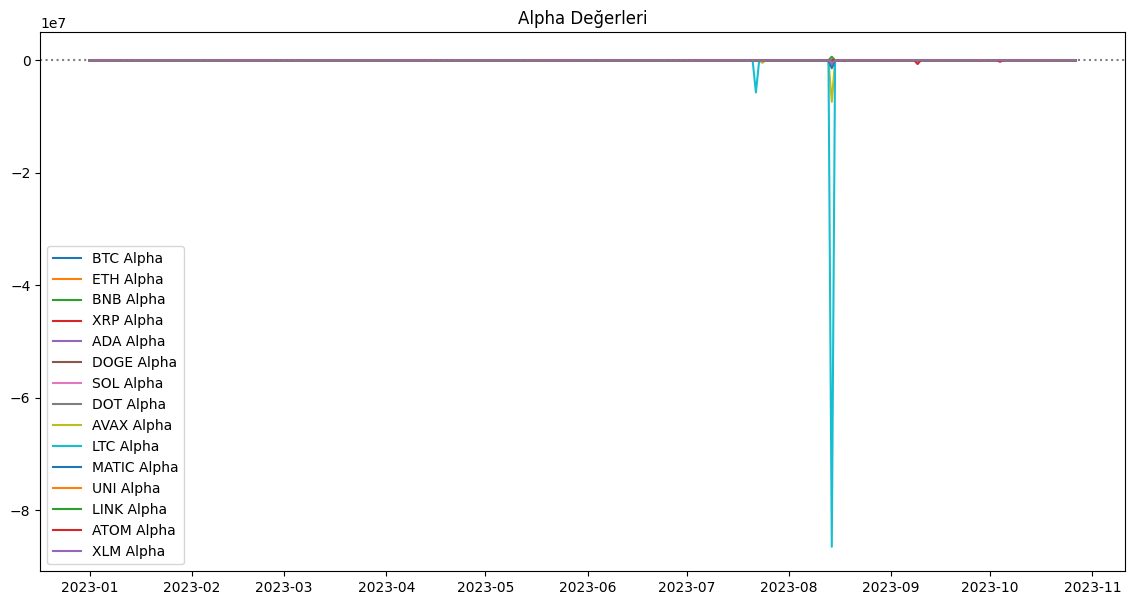

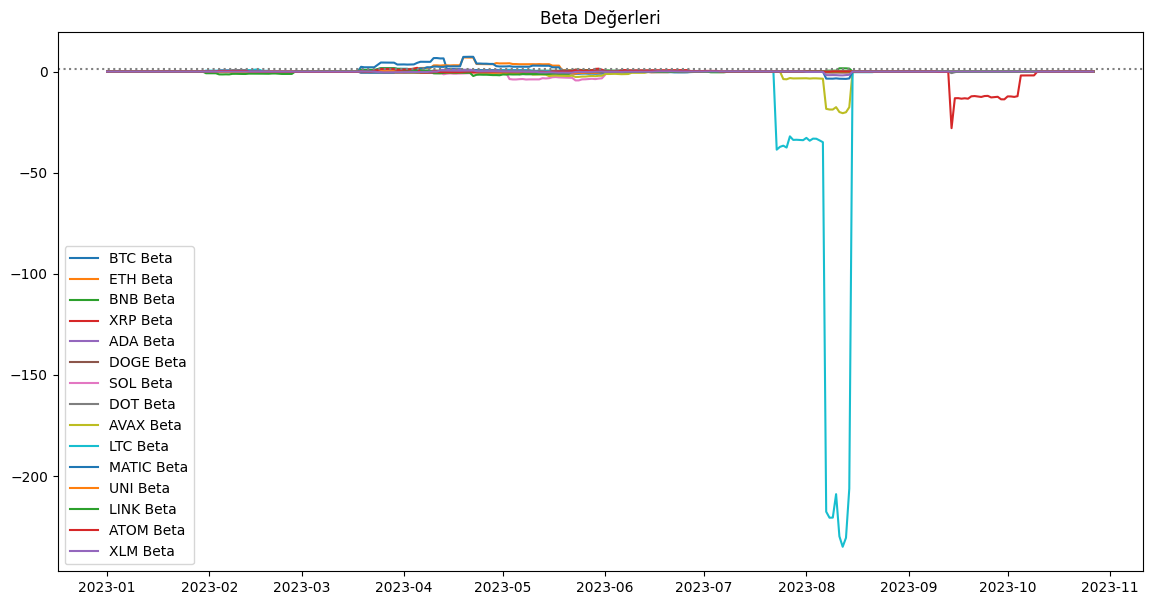

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 15 popüler coin listesi
coins = [
    "BTC", "ETH", "BNB", "XRP", "ADA", "DOGE", "SOL", "DOT", "AVAX", "LTC",
    "MATIC", "UNI", "LINK", "ATOM", "XLM"
]

# Kullanıcıdan seçim al
print("Analiz etmek istediğiniz coinleri seçin:")
for i, coin in enumerate(coins):
    print(f"{i + 1}. {coin}")

selected_indices = input("Coin numaralarını virgülle ayırarak girin (örneğin: 1,2,3): ")
selected_indices = [int(i) - 1 for i in selected_indices.split(",")]
selected_coins = [coins[i] for i in selected_indices]

# Örnek veri oluşturma (seçilen coinler ve bir endeks)
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=300)
data = {'date': dates}

# Her bir coin ve endeks için rastgele kapanış fiyatları oluştur
for coin in selected_coins:
    data[coin] = np.random.rand(300) * 100  # Coin kapanış fiyatları
data['Index'] = np.random.rand(300) * 100  # Endeks kapanış fiyatları

# Veri çerçevesini oluştur
df = pd.DataFrame(data)

# Beta ve Alpha hesaplama fonksiyonu
def calculate_beta_alpha(df, coin, index_col='Index', length=30, alpha_period=90):
    # Getirileri hesapla
    df[f'{coin}_ret'] = df[coin].pct_change()
    df[f'{index_col}_ret'] = df[index_col].pct_change()

    # Standart sapmaları hesapla
    df[f'{coin}_secd'] = df[f'{coin}_ret'].rolling(window=length).std()
    df[f'{index_col}_mktd'] = df[f'{index_col}_ret'].rolling(window=length).std()

    # Beta hesapla
    df[f'{coin}_beta'] = (
        df[f'{coin}_ret'].rolling(window=length).corr(df[f'{index_col}_ret']) *
        df[f'{coin}_secd'] / df[f'{index_col}_mktd']
    )

    # Alpha hesapla
    df[f'{coin}_ret2'] = (df[coin] - df[coin].shift(alpha_period)) / df[coin]
    df[f'{index_col}_ret2'] = (df[index_col] - df[index_col].shift(alpha_period)) / df[index_col]
    df[f'{coin}_alpha'] = (df[f'{coin}_ret2'] - df[f'{index_col}_ret2'] * df[f'{coin}_beta']) * 100

    # NaN değerleri sıfırla
    df[f'{coin}_alpha'] = df[f'{coin}_alpha'].fillna(0)
    df[f'{coin}_beta'] = df[f'{coin}_beta'].fillna(0)

    return df

# Seçilen coinler için Beta ve Alpha hesapla
for coin in selected_coins:
    df = calculate_beta_alpha(df, coin)

# Sonuçları görüntüle (son 5 gün)
results = df[['date'] + [f'{coin}_alpha' for coin in selected_coins] + [f'{coin}_beta' for coin in selected_coins]]
print(results.tail())

# Sonuçları bir tablo halinde görüntüle
results_table = pd.DataFrame({
    'Coin': selected_coins,
    'Alpha': [df[f'{coin}_alpha'].iloc[-1] for coin in selected_coins],
    'Beta': [df[f'{coin}_beta'].iloc[-1] for coin in selected_coins]
})

print("\nAlpha ve Beta Değerleri:")
print(results_table)

# Görselleştirme (Alpha ve Beta değerleri)
plt.figure(figsize=(14, 7))
for coin in selected_coins:
    plt.plot(df['date'], df[f'{coin}_alpha'], label=f'{coin} Alpha')
plt.axhline(0, color='gray', linestyle='dotted')
plt.title('Alpha Değerleri')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
for coin in selected_coins:
    plt.plot(df['date'], df[f'{coin}_beta'], label=f'{coin} Beta')
plt.axhline(1.5, color='gray', linestyle='dotted')
plt.title('Beta Değerleri')
plt.legend()
plt.show()